In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
# np.set_printoptions(threshold=sys.maxsize)
import statistics
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

__Processamento/Tratamento de Dados__

In [2]:
df_comed = pd.read_csv("C:/Users/MASTER/OneDrive/Documentos/PROJETO INTEGRADO - INTELIGÊNCIA ARTIFICIAL E APRENDIZADO DE MÁQUINA/Base de Dados/archive/COMED_hourly.csv")
df_comed

,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0
...,...,...
66492,2018-01-01 20:00:00,13858.0
66493,2018-01-01 21:00:00,13758.0
66494,2018-01-01 22:00:00,13627.0
66495,2018-01-01 23:00:00,13336.0


In [3]:
df_dom = pd.read_csv("C:/Users/MASTER/OneDrive/Documentos/PROJETO INTEGRADO - INTELIGÊNCIA ARTIFICIAL E APRENDIZADO DE MÁQUINA/Base de Dados/archive/DOM_hourly.csv")
df_dom

,Datetime,DOM_MW
0,2005-12-31 01:00:00,9389.0
1,2005-12-31 02:00:00,9070.0
2,2005-12-31 03:00:00,9001.0
3,2005-12-31 04:00:00,9042.0
4,2005-12-31 05:00:00,9132.0
...,...,...
116184,2018-01-01 20:00:00,18418.0
116185,2018-01-01 21:00:00,18567.0
116186,2018-01-01 22:00:00,18307.0
116187,2018-01-01 23:00:00,17814.0


In [4]:
df_seasons = pd.read_excel("C:/Users/MASTER/OneDrive/Documentos/PROJETO INTEGRADO - INTELIGÊNCIA ARTIFICIAL E APRENDIZADO DE MÁQUINA/Base de Dados/archive/Seasons.xlsx")
df_seasons

,Datetime,Season
0,2011-01-01,Inverno
1,2011-01-02,Inverno
2,2011-01-03,Inverno
3,2011-01-04,Inverno
4,2011-01-05,Inverno
...,...,...
2552,2017-12-27,Inverno
2553,2017-12-28,Inverno
2554,2017-12-29,Inverno
2555,2017-12-30,Inverno


In [5]:
# Juntando os DFs DOM e COMED
df_final = pd.merge(df_dom,df_comed,on='Datetime', how='inner', sort=True)

In [6]:
# Filtrar o df entre os anos de 2013 e 2017
df_final['Datetime'] = pd.to_datetime(df_final['Datetime'])
start_date = "2011-01-01"
end_date = "2017-12-31"
df_final = df_final[(df_final['Datetime'] >= start_date) & (df_final['Datetime'] <= end_date)]
df_final = df_final.reset_index(drop=True)

In [7]:
df_final['Data'] = df_final['Datetime'].dt.date
df_final['Hora'] = df_final['Datetime'].dt.time
df_final['Data'] = pd.to_datetime(df_final['Data'])
# df_final['Hora'] = pd.to_datetime(df_final['Hora'])
df_final.drop('Datetime',axis=1,inplace=True)
column_order = ['Data','Hora','DOM_MW','COMED_MW']
df_final = df_final[column_order]

In [8]:
# datelist = np.unique(df_final['Data'])
# datelist

In [9]:
df_seasons.rename(columns={'Datetime':'Data'}, inplace=True)
df_seasons['Data'] = (pd.to_datetime(df_seasons['Data'])).dt.date
df_seasons['Data'] = pd.to_datetime(df_seasons['Data'])
df_final = pd.merge(df_final,df_seasons,on='Data', how='inner', sort=True)

In [10]:
df_final

,Data,Hora,DOM_MW,COMED_MW,Season
0,2011-01-01,01:00:00,10137.0,9631.0,Inverno
1,2011-01-01,02:00:00,9918.0,9273.0,Inverno
2,2011-01-01,03:00:00,9745.0,9011.0,Inverno
3,2011-01-01,04:00:00,9646.0,8741.0,Inverno
4,2011-01-01,05:00:00,9711.0,8694.0,Inverno
...,...,...,...,...,...
61341,2017-12-30,20:00:00,14646.0,13686.0,Inverno
61342,2017-12-30,21:00:00,14664.0,13632.0,Inverno
61343,2017-12-30,22:00:00,14566.0,13423.0,Inverno
61344,2017-12-30,23:00:00,14249.0,13191.0,Inverno


In [11]:
nan_or_empty_count = df_final.isna().sum()
nan_or_empty_count

Data        0
Hora        0
DOM_MW      0
COMED_MW    0
Season      0
dtype: int64

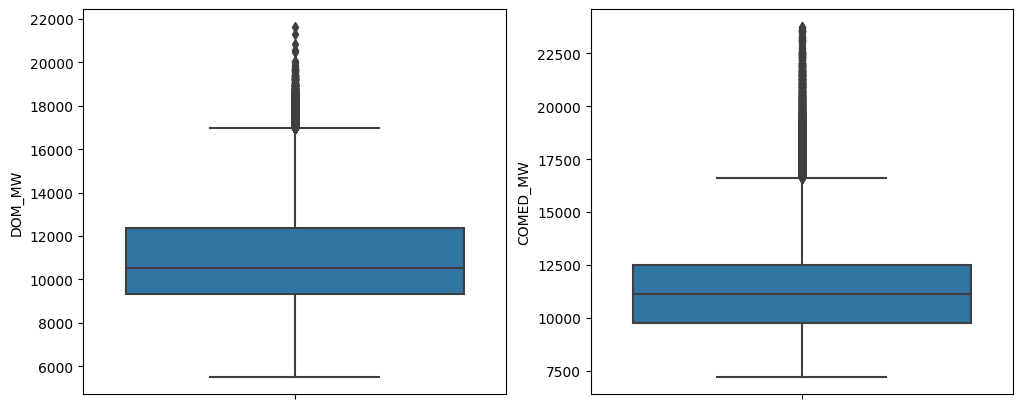

In [12]:
plt.rcParams["figure.figsize"] = [12, 5]
fig, ax =plt.subplots(1,2)
y = sns.boxplot(y=df_final["DOM_MW"], data=df_final, ax=ax[0])
y.tick_params(axis='x', rotation=45)
y = sns.boxplot(y=df_final["COMED_MW"], data=df_final, ax=ax[1])
y.tick_params(axis='x', rotation=45)

In [13]:
outliers = []
desv_pad = statistics.stdev(df_final['DOM_MW'])
media = statistics.mean(df_final['DOM_MW'])
limite = desv_pad * 3

limite_inferior = media - limite
limite_superior = media + limite

for outlier in df_final['DOM_MW']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)

percentual = len(outliers)/len(df_final['DOM_MW'])*100
# percentual da coluna que é outlier
print('Percentual: ',percentual,'%')

Percentual:  0.518371205946598 %


In [14]:
outliers = []
desv_pad = statistics.stdev(df_final['COMED_MW'])
media = statistics.mean(df_final['COMED_MW'])
limite = desv_pad * 3

limite_inferior = media - limite
limite_superior = media + limite

for outlier in df_final['COMED_MW']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)

percentual = len(outliers)/len(df_final['COMED_MW'])*100
# percentual da coluna que é outlier
print('Percentual: ',percentual,'%')

Percentual:  1.5355524402569034 %


__Análise e Exploração de Dados__

In [15]:
# Informações sobre o df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61346 entries, 0 to 61345
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      61346 non-null  datetime64[ns]
 1   Hora      61346 non-null  object        
 2   DOM_MW    61346 non-null  float64       
 3   COMED_MW  61346 non-null  float64       
 4   Season    61346 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.8+ MB


In [16]:
df_final.describe()

,DOM_MW,COMED_MW
count,61346.000000,61346.000000
mean,10970.609102,11414.969696
std,2411.392003,2309.547682
min,5518.000000,7237.000000
25%,9337.000000,9773.000000
50%,10512.000000,11147.000000
75%,12387.000000,12515.000000
max,21651.000000,23753.000000


<Axes: ylabel='Count'>

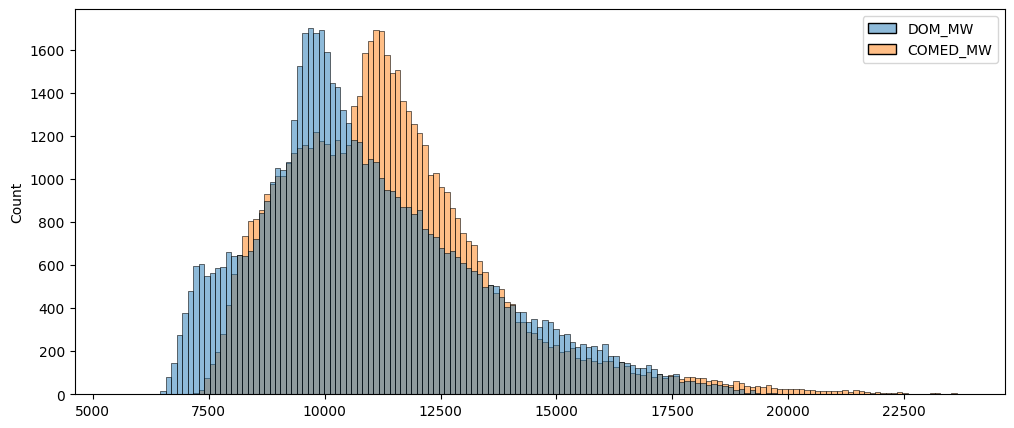

In [17]:
# Histograma dos dados de consumo de energia
sns.histplot(data=df_final)

<Axes: xlabel='Ano', ylabel='value'>

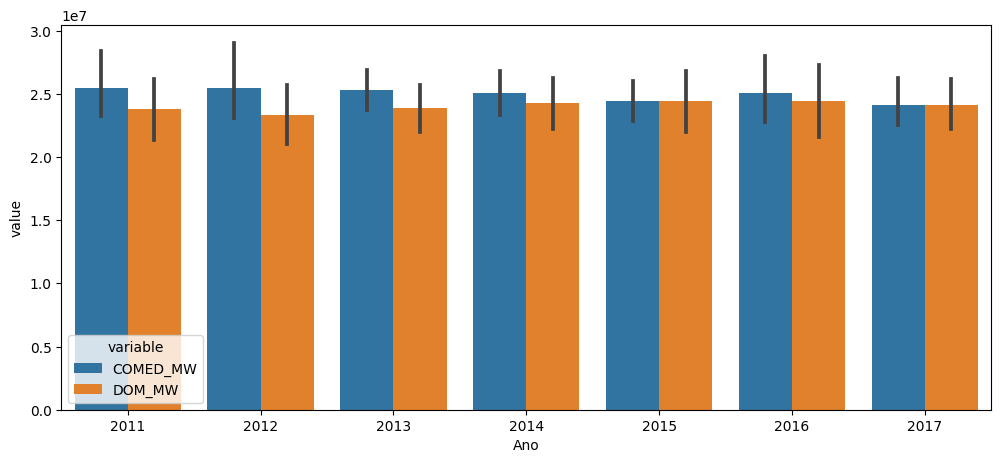

In [18]:
df_final['Ano'] = pd.DatetimeIndex(df_final['Data']).year
df_change = pd.melt(df_final, id_vars=['Ano', 'Season'], value_vars=['DOM_MW', 'COMED_MW'])
df_summed = df_change.groupby(['Ano', 'Season','variable'])['value'].sum().reset_index()

sns.barplot(x='Ano', y='value', hue='variable', data=df_summed)

<Axes: xlabel='Season', ylabel='value'>

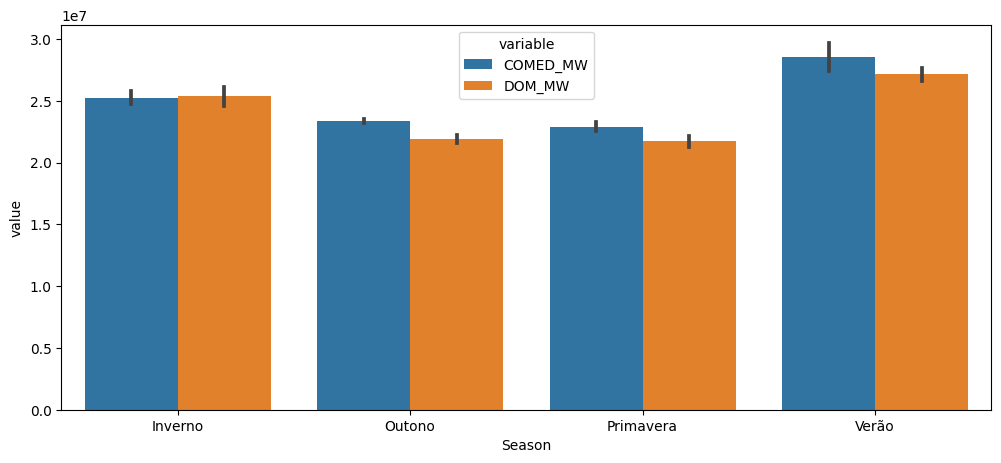

In [19]:
sns.barplot(x='Season', y='value', hue='variable', data=df_summed)

In [20]:
# df_mean = df_change.groupby(['Ano', 'Season','variable'])['value'].mean().reset_index()
# sns.barplot(x='Ano', y='value', hue='variable', data=df_mean)
# sns.barplot(x='Season', y='value', hue='variable', data=df_mean)

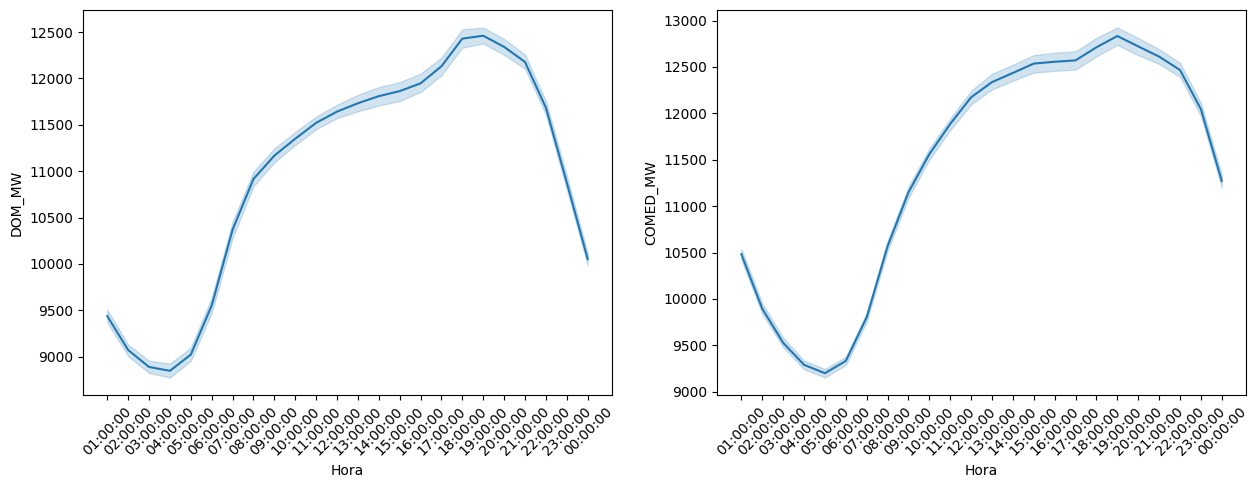

In [21]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, ax =plt.subplots(1,2)
y = sns.lineplot(x=df_final["Hora"].astype(str),y=df_final["DOM_MW"], data=df_final, ax=ax[0])
y.tick_params(axis='x', rotation=45)
y = sns.lineplot(x=df_final["Hora"].astype(str),y=df_final["COMED_MW"], data=df_final, ax=ax[1])
y.tick_params(axis='x', rotation=45)

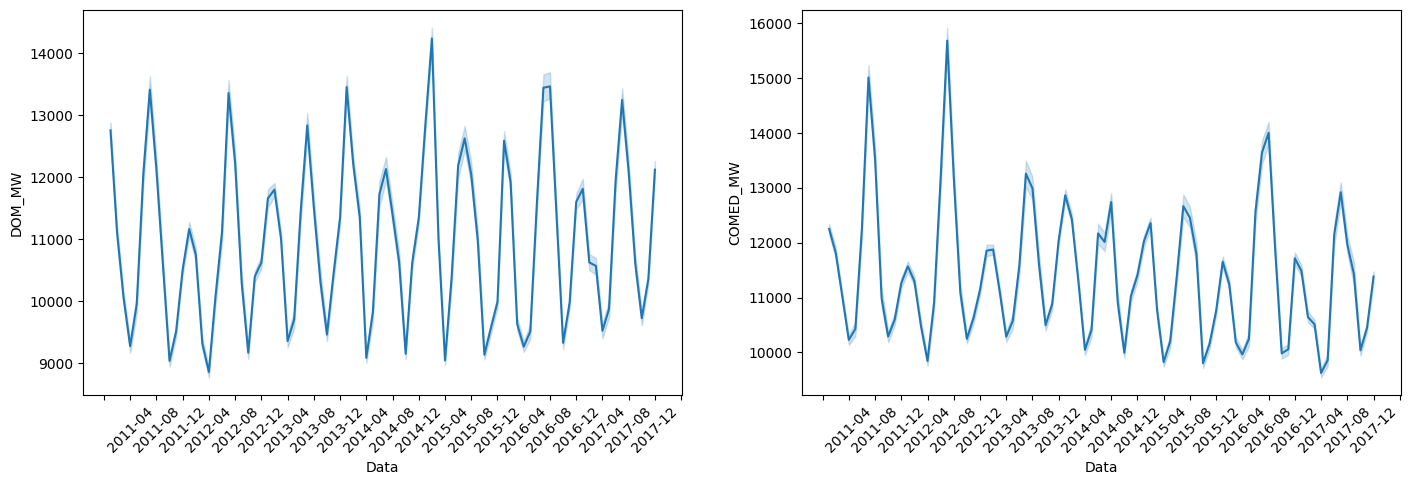

In [22]:
plt.rcParams["figure.figsize"] = [17, 5]
fig, ax =plt.subplots(1,2)
y = sns.lineplot(x=pd.to_datetime(df_final['Data']).dt.strftime('%Y-%m'),y=df_final["DOM_MW"], data=df_final, ax=ax[0])
y.tick_params(axis='x', rotation=45)
locator = mdates.DayLocator(interval=4)
y.xaxis.set_major_locator(locator)
y = sns.lineplot(x=pd.to_datetime(df_final['Data']).dt.strftime('%Y-%m'),y=df_final["COMED_MW"], data=df_final, ax=ax[1])
y.tick_params(axis='x', rotation=45)
locator = mdates.DayLocator(interval=4)
y.xaxis.set_major_locator(locator)